## 1  Загрузка данных и подготовка их к анализу

**Описание проекта.**             
В крупном интернет-магазине аналитик вместе с отделом маркетинга подготовили список гипотез для увеличения выручки. Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

In [6]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [3]:
#посмотрим на основные параметры имеющихся данных
def information(x):
    display('Распределение численных значений')
    display(x.describe())
    display('Частота встречаемости строк')
    display(x.value_counts())
    display('Получение первых 10 строк таблицы')
    display(x.head(10))
    display('Получение общей информации о данных в таблицах')
    display(x.info())
    display('Наличие пропусков в таблице')
    display(x.isna().sum())
    display('Наличие дубликатов в таблице')
    display(x.duplicated().sum())
    x.columns = [a.lower().replace(' ', '_') for a in x.columns]
information(hypothesis)
information(orders)
information(visitors)

'Распределение численных значений'

,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


'Частота встречаемости строк'

Hypothesis                                                                                                    Reach  Impact  Confidence  Efforts
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа  8      3       7           3          1
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей            3      10      8           6          1
Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                      3      2       2           3          1
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок              10     7       8           5          1
Запустить акцию, дающую скидку на товар в день рождения                                                       1      9       9           5          1
Запустить собственную службу доставки, что сократит срок доставки заказов                                

'Получение первых 10 строк таблицы'

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


'Получение общей информации о данных в таблицах'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

'Наличие пропусков в таблице'

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

'Наличие дубликатов в таблице'

0

'Распределение численных значений'

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


'Частота встречаемости строк'

transactionId  visitorId   date        revenue  group
1062393        2661240577  2019-08-05  6420     A        1
2883105032     3086835579  2019-08-23  2646     A        1
2875229767     1627549308  2019-08-05  650      B        1
2872509092     983496389   2019-08-02  165      A        1
2866469834     3917749921  2019-08-29  3950     B        1
                                                        ..
1476831880     1422476412  2019-08-14  6180     A        1
1476390797     2044161277  2019-08-31  1450     B        1
1473132782     4069496402  2019-08-12  640      B        1
1472783002     1617417821  2019-08-26  1690     A        1
4293855558     8300375     2019-08-07  1790     A        1
Length: 1197, dtype: int64

'Получение первых 10 строк таблицы'

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


'Получение общей информации о данных в таблицах'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

'Наличие пропусков в таблице'

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

'Наличие дубликатов в таблице'

0

'Распределение численных значений'

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


'Частота встречаемости строк'

date        group  visitors
2019-08-01  A      719         1
2019-08-24  A      395         1
2019-08-17  B      421         1
2019-08-18  A      668         1
            B      737         1
                              ..
2019-08-13  B      769         1
2019-08-14  A      735         1
            B      746         1
2019-08-15  A      628         1
2019-08-31  B      718         1
Length: 62, dtype: int64

'Получение первых 10 строк таблицы'

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


'Получение общей информации о данных в таблицах'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

'Наличие пропусков в таблице'

date        0
group       0
visitors    0
dtype: int64

'Наличие дубликатов в таблице'

0

In [4]:
#переведем даты в подходящий формат 
orders['date']= pd.to_datetime(orders['date'])
visitors['date']=pd.to_datetime(visitors['date'])

Изучены данные из датасетов hypothesis, orders, visitors
- в датафрейме hypothesis названия столбцов приведены к нижнему регистру
- в датафреймах orders и visitors столбец 'date' приведен к типу datetime
- Все три датафрейма проверены на наличие пропусков и дубликатов- и пропуски, и дубликаты отсутствуют. 

## Часть 1. Приоритизация гипотез.

In [7]:
#Применим фреймворк ICE для приоритизации гипотез, отсортируем их по убыванию приоритета.
pd.options.display.max_colwidth = 150
hypothesis['ICE'] = ((hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']).round(1)
print(hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending = False))

                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

In [8]:
#Применим фреймворк RICE для приоритизации гипотез, отсортируем их по убыванию приоритета.
hypothesis['RICE'] = ((hypothesis['impact']*hypothesis['confidence']*hypothesis['reach'])/hypothesis['efforts']).round(1)
print(hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending = False))

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

 **Вывод.**             
При применении фремворка ICE в лидеры выбиваются гипотезы с индексами : 8, 0, 7, 6                     
8 - Запустить акцию, дающую скидку на товар в день рождения           
0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей  
7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок     
6 -   Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию          
                     
, а при применении фреймворка RICE : 7, 2, 0, 6           
2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа                      
,на первое место выбивается гипотеза с индексом 7 -(Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок ) .  Так получилось, потому что её параметр Reach(скольких пользователей затронет изменение, которое вы хотите внести) равен 10, в то время как у других гипотез он меньше. Гипотеза с индексом 2 - (Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа ) так же имеет высокий параметр Reach -8. Кроме силы гипотез, необходимо учитывать, как много пользователей она затронет.

## Часть 2. Анализ A/B-теста

### График кумулятивной выручки по группам. 

In [9]:
new_orders = orders[['visitorid','group']].drop_duplicates(subset=['visitorid','group']).sort_values(by= ['visitorid', 'group'])
display(new_orders)

,visitorid,group
56,5114589,B
573,6958315,B
703,8300375,A
71,8300375,B
233,11685486,A
...,...,...
682,4266935830,B
886,4278982564,A
576,4279090005,B
392,4281247801,B


In [10]:
both_groups = new_orders.groupby('visitorid').filter(lambda x: set(x['group']) == {'A', 'B'})
if len(both_groups) > 0:
    print("Есть пользователи, которые попали в обе группы")
    print(both_groups)
else:
    print("Нет пользователей, которые попали в обе группы")

Есть пользователи, которые попали в обе группы
       visitorid group
703      8300375     A
71       8300375     B
26     199603092     A
246    199603092     B
1013   232979603     A
...          ...   ...
814   4186807279     B
114   4256040402     A
60    4256040402     B
662   4266935830     A
682   4266935830     B

[116 rows x 2 columns]


Таким образом, мы видим, что 58 пользователей попали в обе группы, при проведении A/B тестов при таких довольно небольших пересечения принимают решение оставить этих пользователей как есть, удалять не будем.


Text(0.5, 1.0, 'График кумулятивной выручки по группам.')

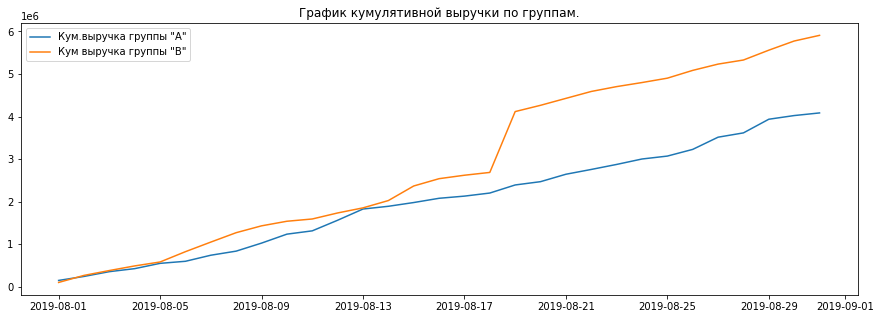

In [11]:
#Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionid': 'nunique',
            'visitorid': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Кум.выручка группы "A"')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Кум выручка группы "B"')
plt.legend()
plt.title('График кумулятивной выручки по группам.')

Из графиков видно, что в начале месяца выручка в группе А и В равномерно растет, начиная с 5 августа группа В начинает опережать группу А по выручке, а после 18-19 августа- происходит резкий скачек у группы В, это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.


### График кумулятивного среднего чека по группам. 

Text(0.5, 1.0, 'График кумулятивного среднего чека по группам.')

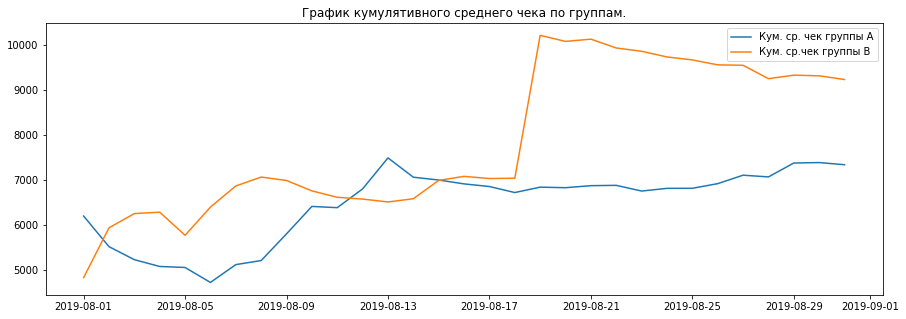

In [12]:
#Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='Кум. ср. чек группы А')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='Кум. ср.чек группы B')
plt.legend() 
plt.title('График кумулятивного среднего чека по группам.')

Видна схожесть графика кумулятивного среднего чека с предыдущим графиком - средний чек группы В в большем количестве дней превосходит средний чек группы А, особенно ярко это становится заметно после 19 августа, но к концу теста прослеживается снижение среднего чека группы В, а в случае группы А-стабильный, медленный рост.

In [13]:
# посмотрим из-за чего происходит такой скачек- очень дорогие заказы или же всплеск их количества.
cumulativeRevenueB.query('"2019-08-17"<= date <= "2019-08-21"')

,date,revenue,orders
33,2019-08-17,2620790,373
35,2019-08-18,2686621,382
37,2019-08-19,4116541,403
39,2019-08-20,4263815,423
41,2019-08-21,4426892,437


In [14]:
orders.query('date == "2019-08-19"').sort_values(by='revenue', ascending=False).head(5)

,transactionid,visitorid,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
530,3970235543,2912540959,2019-08-19,43990,A
527,1570513684,2837914161,2019-08-19,33405,B
421,3765974140,1357170471,2019-08-19,31680,A
461,2683113224,154576532,2019-08-19,26550,B




Дело явно не в количестве заказов-оно не сильно отличается по дня, а вот дороговизна-да! 19 августа есть заказ (425), стоимость которого 1294500, в то время, как стоимость других заказов не привышает 44 тыс.


### График относительного изменения кумулятивного среднего чека группы B к группе A. 

Text(0.5, 1.0, 'Относительное изменение кумулятивного среднего чека группы B к группе А')

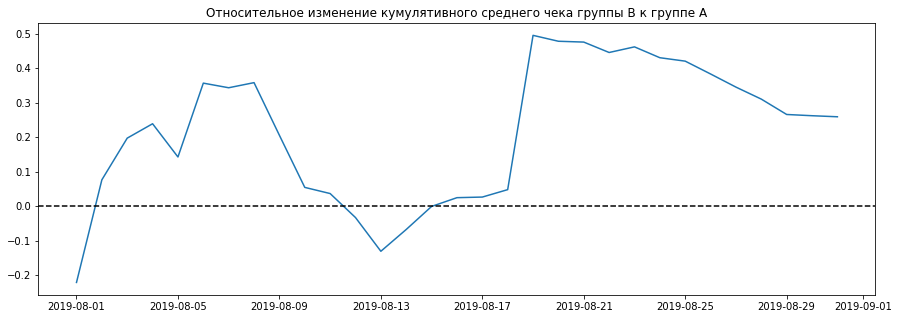

In [15]:
#построим график относительного изменения кумулятивного среднего чека группы B к группе A.
plt.figure(figsize=(15,5))
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date',
                                                   right_on='date', how='left', suffixes=['A', 'B'])
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе А')

На графике мы видим резкий скачек среднего чека группы В 19 августа, как уже выяснили из-за аномально дорогого заказа 425.Начиная с 2-3 августа средний чек группы В уже превысил группу А, в период с 12-14 августа средний чек группы А был выше, но с 15 августа группа В опять вырвалась в лидеры и продержалась так до конца месяца, хотя и средний чек к концу месяца начал снижаться.


### График кумулятивного среднего количества заказов на посетителя по группам. 

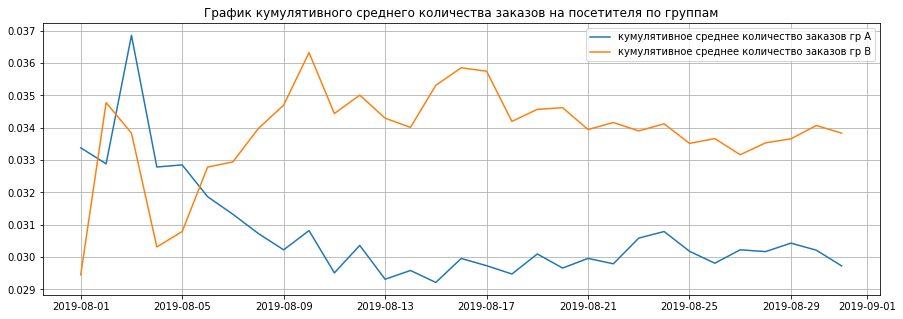

In [16]:
# построим график кумулятивного среднего количества заказов на посетителя по группам. 
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='кумулятивное среднее количество заказов гр A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='кумулятивное среднее количество заказов гр B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.legend();

- По графику видно, что ,начиная с 6 августа, количество заказов группы В превысило группу А, и осталось выше до конца месяца.
- У группы А видим скачек 3-4 августа по среднему количеству заказов, вероятно, были какие-то спец предложения/акции, ведь у группы В тоже видим увеличение количества заказов, после чего показатель у группы А пошел на спад, к концу месяца продолжает снижаться.


### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

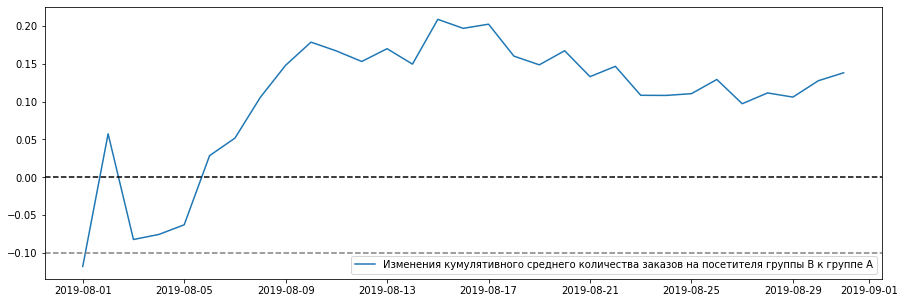

In [17]:
#построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

plt.figure(figsize=(15,5))
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], \
                                                    left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Изменения кумулятивного среднего количества заказов на посетителя группы B к группе A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

В начале теста группа В проигрывала группе А, но, начиная с 3 августа показатель начал расти и после 6 августа так и остался значительно выше группы А, в среднем на 10-15%.


### Точечный график количества заказов по пользователям.  

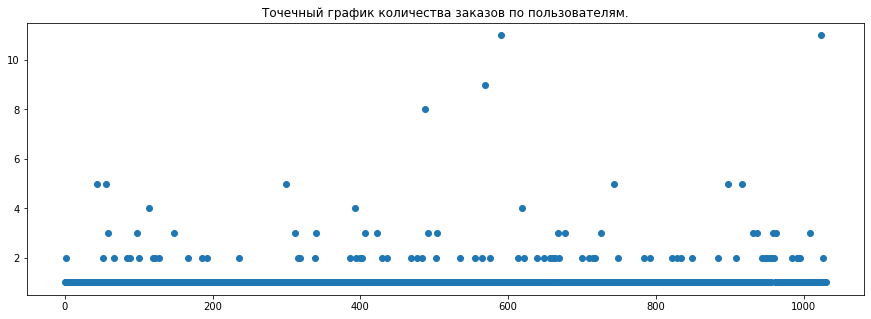

In [18]:
#построим точечный график количества заказов по пользователям. 

plt.figure(figsize=(15,5))
plt.title('Точечный график количества заказов по пользователям.')
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorid', as_index=False). \
                                                                        agg({'transactionid' : pd.Series.nunique})

ordersByUsers.columns = ['user_id','orders']

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 

По графику видно, что бОльшее количество пользователей имеют 1 заказ, по 2 заказа - заметно меньше. Можно выбрать границу аномальных заказов между 2 и 4. Однако, принято отсеивать от 1% до 5% наблюдений с крайними значениями-необходимо рассчитать 95 и 99 персентиль.


### 95-й и 99-й перцентили количества заказов на пользователя.

In [19]:
#Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.
#Выберем границу для определения аномальных пользователей.
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]



Можно сделать вывод, что больше 2 заказов совершают только 5% пользователей, значит все, что больше 2 заказов-аномалии.


### Точечный график стоимостей заказов.

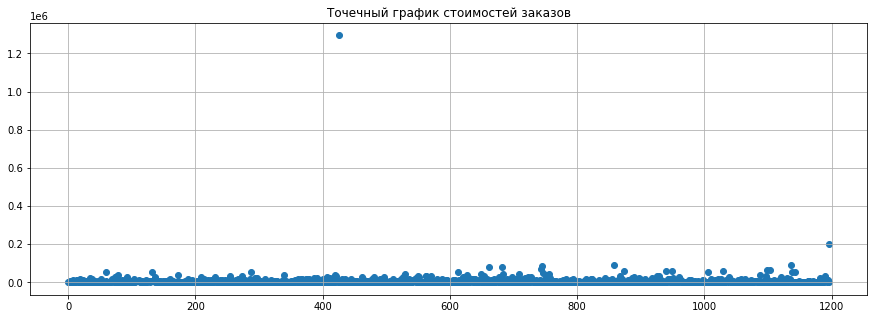

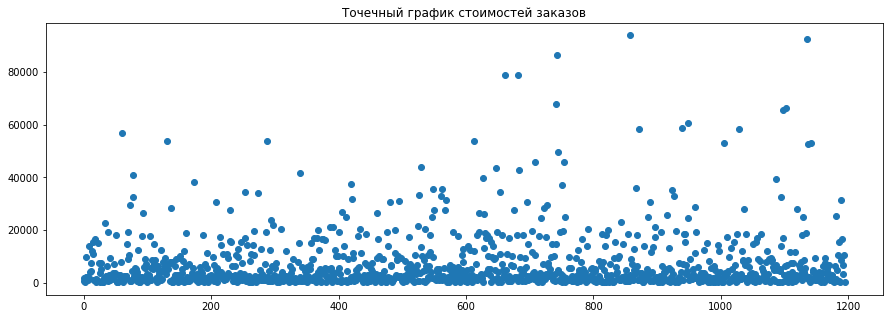

In [20]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('Точечный график стоимостей заказов')
plt.scatter(x_values, orders['revenue']);

new_orders = orders[orders['revenue']<=200000]['revenue']
x_values = pd.Series(range(0,len(new_orders)))
plt.figure(figsize=(15,5))
plt.title('Точечный график стоимостей заказов')
plt.scatter(x_values, new_orders);

На графике видно, что большая часть заказов не превышает 100000, но так же есть заказы, которые достигают 1.3млн, 200000-скорее всего сочтем их аномалиями.

### 95-й и 99-й перцентили стоимости заказов.  

In [21]:
#Посчитаем 95-й и 99-й перцентили стоимости заказов. 
#Выберем границу для определения аномальных заказов.
print(np.percentile(orders['revenue'],[95,99]))

[28000.  58233.2]


Лишь 5% заказов превышает стоимость в 28000- будем считать, что все заказы, дороже 28000-аномалия.


### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

In [22]:
#посчитаем статистическую значимость различий в среднем количестве заказов 
#на посетителя между группами по «сырым» данным.
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = orders[orders['group']=='A'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']



data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
data.head()


,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [23]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['userid', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['userid', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print("Относительные различия в среднем количестве заказов: = {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 


alpha = 0.05
p-value = 0.017
Относительные различия в среднем количестве заказов: = 0.138


1.Сформулируем гипотезы.       
Нулевая: различий в среднем количестве заказов между группами нет.         
    Альтернативная: различия в среднем между группами есть.            
2.Начнём с подготовки данных.
3.Вывод
тк p-value равен 0.017, он меньше 0.05-значит нулевую гипотезу(различий в среднем количестве заказов между группами нет)-отвергаем. Выходит, что различия в среднем количестве заказов есть.


### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

In [25]:
#Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']
                                                    ['revenue'], orders[orders['group']=='B']['revenue'],
                                                    alternative = 'two-sided')[1]))
print("Относительные различия в среднем чеке между группами = {0:.3f}".format(orders[orders['group']=='B']
                                                            ['revenue'].mean()/orders[orders['group']=='A']
                                                            ['revenue'].mean()-1)) 

alpha = 0.05
p-value = 0.729
Относительные различия в среднем чеке между группами = 0.259


Нулевая гипотеза: различий в среднем чеке заказа между группами нет.
Альтернативная: разичия в среднем чеке заказа между группами есть. тк p-value равен 0.729, и он больше 0.05 - мы не отвергаем нулевую гипотезу- различий в среднем чеке между группами нет.     
У нас есть такое относительное различие в среднем чеке заказа между группами, но оно получено случайным образом

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

In [26]:
#Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя 
#между группами по «очищенным» данным. 


usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userid'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userid']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'],95)]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userid'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userid'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                                       name='orders')],axis=0) 


print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print("Относительные различия в среднем количестве заказов: = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 


alpha = 0.05
p-value = 0.013
Относительные различия в среднем количестве заказов: = 0.173


В предыдущих пунктах мы определились, что аномальными будут являться заказы более 2 и дороже 28000-сделаем срезы.
Нулевая гипотеза: различий в среднем количестве заказов между группами нет.
Альтернативная: различия в среднем между группами есть.
тк p-value 0.013, он меньше 0.05-отвергаем нулевую гипотезу, делаем вывод, что различия в среднем количестве между группами есть.


### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [27]:
#посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]))

print("Относительные различия в среднем чеке между группами = {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

alpha = 0.05
p-value = 0.738
Относительные различия в среднем чеке между группами = -0.020


Нулевая гипотеза: различий в среднем чеке заказа между группами нет.
Альтернативная: разичия в среднем чеке заказа между группами есть.
тк p-value 0.738, он больше 0.05-значит нулевую гипотезу не отвеграем- различий в среднем чеке нет. В очищенных данных средний чек группы В на 2% ниже, чем у группы А, хотя в сырых данных был выше на 26%, такой результат мы получаем ввиду аномально дорого заказа на 1.3млн.


По результатам теста принимаем решение остановить тестирование и зафиксировать победу группы В(группа В превосходит группу А по конверсии, а средние чеки групп примерно равны), результаты достаточно однозначны.

## Вывод. 

Было необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

Изучены данные из датасетов hypothesis, orders, visitors-в датафрейме hypothesis названия столбцов приведены к нижнему регистру, в датафреймах orders и visitors столбец 'date' приведен к типу datetime. Все три датафрейма проверены на наличие пропусков и дубликатов- и пропуски, и дубликаты отсутствуют.

При применении фремворка ICE в лидеры выбиваются гипотезы с индексами : 8, 0, 7, 6 8 - Запустить акцию, дающую скидку на товар в день рождения 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

, а при применении фреймворка RICE : 7, 2, 0, 6 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа ,на первое место выбивается гипотеза с индексом 7 -(Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок ) . Так получилось, потому что её параметр Reach(скольких пользователей затронет изменение, которое вы хотите внести) равен 10, в то время как у других гипотез он меньше. Гипотеза с индексом 2 - (Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа ) так же имеет высокий параметр Reach -8. Кроме силы гипотез, необходимо учитывать, как много пользователей она затронет.

Проанализировав графики среднего чека и среднего количества заказов по группам отметили:
-19 августа есть заказ (425), стоимость которого 1294500, в то время, как стоимость других заказов не привышает 44 тыс., он является аномальным.
-заказы более 2- аномальны
-стоимость заказа свыше 28000-аномальны.

Мы видвинули две основные нулевы гипотезы, и две альтернативные:
Нулевая 1: различий в среднем количестве заказов между группами нет.
Альтернативная 1: различия в среднем между группами есть.

Нулевая гипотеза 2: различий в среднем чеке заказа между группами нет.
Альтернативная 2: разичия в среднем чеке заказа между группами есть.

Проанализировав 'сырые' и 'очищенные' данные сделали выводы :
1. Отвергаем нулевую гипотезу, делаем вывод, что различия в среднем количестве между группами есть.
2 Нулевую гипотезу не отвеграем- различий в среднем чеке нет. В очищенных данных средний чек группы В на 2% ниже, чем у группы А, хотя в сырых данных был выше на 26%, такой результат мы получаем ввиду аномально дорого заказа на 1.3млн.

По результатам теста принимаем решение остановить тестирование и зафиксировать победу группы В(группа В превосходит группу А по конверсии, а средние чеки групп примерно равны), результаты достаточно однозначны.
